In [2]:
import numpy as np, basic, cosmology
#from scipy.integrate import quad
from matplotlib.pyplot import *
#from scipy.interpolate import InterpolatedUnivariateSpline as spline
import camb
from camb import model, initialpower
from camb.sources import GaussianSourceWindow, SplinedSourceWindow

In [3]:
lmax = 3000
l =  np.arange(0, lmax+1)

In [19]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
#set Want_CMB to true if you also want CMB spectra or correlations
pars.Want_CMB = False
#NonLinear_both or NonLinear_lens will use non-linear corrections
pars.NonLinear = model.NonLinear_both
#Set up W(z) window functions
z0=0.311
zs = np.arange(0, 10, 0.02)
W = np.exp(-zs/z0)*(zs/z0)**2/2/z0
bias = 1 + 0.84*zs
#bias = np.ones(len(zs))
lmax=3000
pars.set_for_lmax(lmax, lens_potential_accuracy=5)
pars.SourceWindows = [ SplinedSourceWindow( z=zs, W=W, dlog10Ndm=.0, bias_z=bias ) ]

In [20]:
print(pars.SourceWindows)

0: <SplinedSourceWindow>
  source_type = counts
  bias = 1.0
  dlog10Ndm = 0.0



In [21]:
results = camb.get_results(pars)
cls = results.get_source_cls_dict()

In [22]:
nbar = 40/(np.pi/180/60)**2 # Poission noise
ls= np.arange(2,lmax+1)
Dnoise = 1/nbar*ls*(ls+1)/2/np.pi

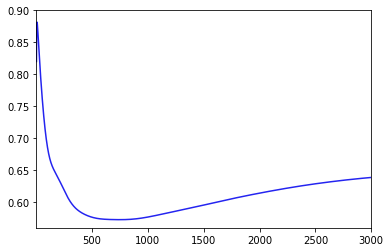

In [23]:
xlim(2,lmax)
ylim(0.56,0.9)
rho = cls['PxW1'][2:lmax+1]/np.sqrt( (cls['W1xW1'][2:lmax+1]+Dnoise)*cls['PxP'][2:lmax+1] )
plot(l[2:],rho)